<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/geometric_image_transformations_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this notebook, we are going to introduce how to perform geometric image transformations in OpenCV (e.g. translation, rotation, affine transformation, among others). 

OpenCV provides two transformation functions, `cv2.warpAffine()` and `cv2.warpPerspective()`, with which you can perform all kinds of transformations. `cv2.warpAffine()` takes a `2x3` transformation matrix while `cv2.warpPerspective()` takes a `3x3 `transformation matrix as input.

# Geometric image transformation in OpenCV

**Scaling** is just resizing of the image, which can be performed with function `cv2.resize()`. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used:
*   For shrinking: `cv2.INTER_AREA` and `cv2.INTER_CUBIC` (slow) 
*   For zooming: `cv2.INTER_LINEAR` 

By default, the interpolation method `cv2.INTER_LINEAR` is used for all resizing purposes.

As an example, if we want to resize an image using the scaling factor for each dimension of the image, we can perform as follows (in this case the scaling factor is `0.5` in every dimension):
```
small_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
```
You can resize also the image specifying the new size:
```
big_image= cv2.resize(image, (width * 2, height * 2), interpolation=cv2.INTER_LINEAR)
```
**Translation** is the shifting of an object's location. In this sense, if you want to shift the object's location in the (x,y) direction, for example $\ (t_x,t_y) $, you can create the transformation matrix `M` as follows:

$\ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$

You can make use of NumPy arrays to make this transformation matrix `M` (array of type `np.float32`) and pass this transformation matrix `M` into the `cv2.warpAffine()` function.  Threfore, you need to create the `2x3` transformation matrix making use of NumPy array with float values (float32). For example, for a translation in the `x` direction: `200` pixels, and a translation in the `y` direction: `30` pixels, the following matrix `M `should be created:
```
M = np.float32([[1, 0, 200], [0, 1, 30]])
```

**Rotation**: To rotate the image we make use of the function  `cv2.getRotationMatrix2D()` to build the `2x3 `rotation matrix:

$\ \begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix} $

where:

$\ \begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}  $

been $\ \theta $ the rotation angle and `scale` is to set the scaled rotation, with adjustable `center` of rotation so that you can rotate at any location you prefer. 

Check out the below example which rotates the image by `180` degrees (upside down) with respect to center without any scaling.

```
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols / 2.0, rows / 2.0), 180, 1)
dst = cv.warpAffine(img,M,(cols,rows))
```

**Affine transformation**: In affine transformation, all parallel lines in the original image will still be parallel in the output image. In an affine transformation we first make use of the function `cv2.getAffineTransform()` to build the `2x3` transformation matrix, which is obtained from the relation between three points from the input image and their corresponding coordinates in the transformed image. Finally, this matrix is passed to `cv2.warpAffine()`:

```
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
```

**Perspective Transformation**: For perspective transformation, you need first a `3x3` transformation matrix, which is constructed using `cv2.getPerspectiveTransform()`, which needs four pairs of points (coordinates of a quadrangle in both the source and output image). 

Therefore, to correct the perspective, you need to create the transformation matrix making use of the aforementioned function `cv2.getPerspectiveTransform()` and then, apply `cv2.warpPerspective()`, where the source image is transformed applying the specified matrix and with a specified size.

```
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
```

**Cropping**: To make a copy of a certain region of the source image.

See [Geometric Transformations of Images](https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html ) for more information about this. 

Finally, you can also execute the script **geometric_image_transformations.py** to see more examples about previous geometric transformations. This script can be seen [here](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter05/01-chapter-content/geometric_image_transformations.py). See next in order to see how to download, execute, explore and see the output.





In [ ]:
import requests

# https://stackoverflow.com/questions/14409167/how-to-pass-a-variable-to-magic-%C2%B4run%C2%B4-function-in-ipython
def download_and_execute_file(fname, url, params="", execute=True, show_content=False):
  # Download and write the file:
  r = requests.get(url)
  open(fname , 'wb').write(r.content)

  # Show the content of the script if required:
  if show_content:
    print("\n")
    with open(fname,'r') as testwritefile:
      print(testwritefile.read())
    print("\n")

  # Execute the script if required:
  if execute:    
    execution = "run " + fname + " " + params
    ipy = get_ipython()
    ipy.magic(execution)



"""
Geometric image transformations
"""

# Import required packages:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def show_with_matplotlib(img, title):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()


# Read the input image:
image = cv2.imread('lena_image.png')

# Show loaded image:
show_with_matplotlib(image, 'Original image')

# 1. Scaling or resizing
# Resize the input image using cv2.resize()
# Resize using the scaling factor for each dimension of the image
# In this case the scaling factor is 0.5 in every dimension
dst_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Get the height and width of the image:
height, width = image.shape[:2]

# You can resize also the image specifying the new size:
dst_image_2 = cv2.resize(image, (width * 2, height * 2), interpolatio

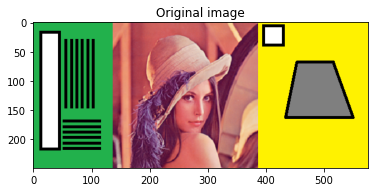

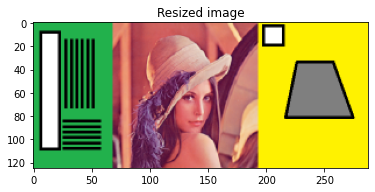

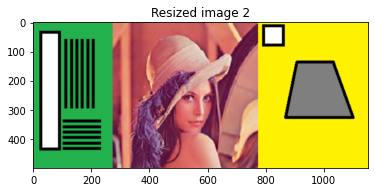

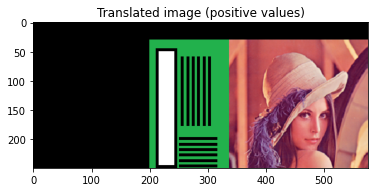

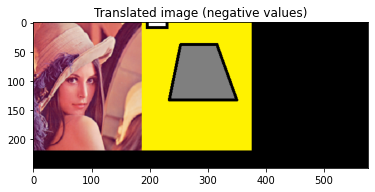

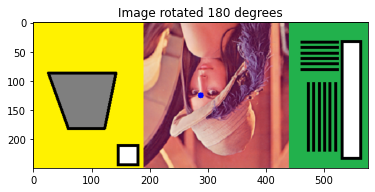

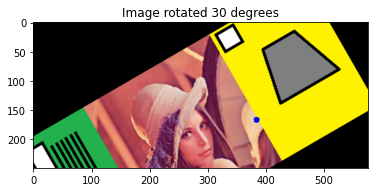

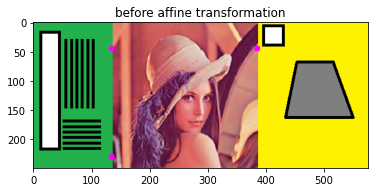

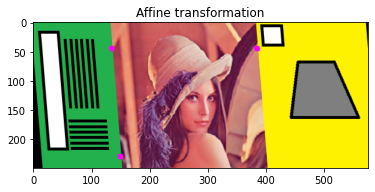

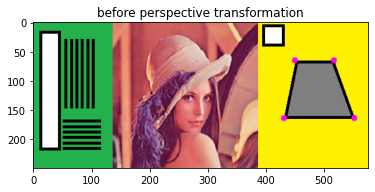

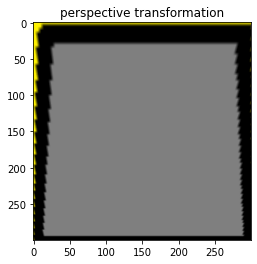

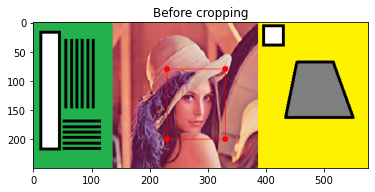

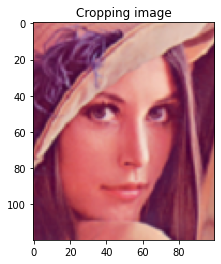

In [ ]:
fname = "lena_image.png"
url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter05/01-chapter-content/lena_image.png"
download_and_execute_file(fname, url, params= "", execute=False, show_content=False)

fname = "geometric_image_transformations.py"
url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-OpenCV-4-with-Python/master/Chapter05/01-chapter-content/geometric_image_transformations.py"
download_and_execute_file(fname, url, params= "", execute=True, show_content=True)

# Conclusions

In this notebook, we have seen how to perform geometric image transformations using OpenCV. More specifically, we have seen: scaling, cropping, perspective correction, affine transformation and rotation.